In [1]:
pip install flat_table

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import io
import flat_table
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df1 = pd.read_csv("aqi.csv")

In [4]:
#print(df1.columns)

In [5]:
#df1['city']

In [6]:
#df1.dtypes

In [7]:
columns1 = ['weather', 'base', 'visibility', 'dt', 'timezone', 'id', 'name', 'cod',
       'coord.lon', 'coord.lat', 'main.temp', 'main.feels_like',
       'main.temp_min', 'main.temp_max', 'main.pressure', 'main.humidity',
       'main.sea_level', 'main.grnd_level', 'wind.speed', 'wind.deg',
       'clouds.all', 'sys.country', 'sys.sunrise', 'sys.sunset']

In [8]:
response_df1 = pd.DataFrame(columns = columns1)

In [9]:
for i in range(len(df1)):
    #city = df1['city'][i]
    url='http://api.openweathermap.org/data/2.5/weather?lat='+str(df1['Latitude'][i])+'&lon='+str(df1['Longitude'][i])+'&appid=7f9de45d1cc7764baf0aea8a915a7ff2'
    r = requests.get(url).json()
    temp_df1 = pd.json_normalize(r)
    response_df1 = response_df1.append(temp_df1, ignore_index=True)

In [10]:
response_df1 = flat_table.normalize(response_df1, expand_dicts=False, expand_lists=True)

In [11]:
response_df1.head()

,index,weather.icon,weather.description,weather.main,weather.id,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,clouds.all,sys.country,sys.sunrise,sys.sunset,wind.gust,sys.type,sys.id,rain.1h
0,0,50d,haze,Haze,721,stations,4000,1616060584,19800,1279290,Agartala,200,91.2824,23.8312,306.15,305.58,306.15,306.15,1009,31,NaN,NaN,2.42,299,84,IN,1616025665,1616069095,4.17,1.0,9107.0,NaN
1,1,02d,few clouds,Clouds,801,stations,10000,1616060584,19800,1276559,Belanganj,200,78.0098,27.1753,309.69,307.05,309.69,309.69,1006,11,1006,987,1.22,226,22,IN,1616028858,1616072271,2.57,NaN,NaN,NaN
2,2,50d,smoke,Smoke,711,stations,5000,1616060584,19800,1279233,Ahmedabad,200,72.5797,23.0216,311.15,309.27,311.15,311.15,1007,23,NaN,NaN,4.12,250,20,IN,1616030148,1616073587,NaN,1.0,9049.0,NaN
3,3,50d,haze,Haze,721,stations,4000,1616060585,19800,1279186,Aizawl,200,92.7383,23.7435,305.15,302.32,305.15,305.15,1010,19,NaN,NaN,2.57,20,25,IN,1616025315,1616068745,NaN,1.0,9122.0,NaN
4,4,04d,broken clouds,Clouds,803,stations,10000,1616060109,19800,1279159,Ajmer,200,74.6390,26.4691,307.12,303.88,307.12,307.12,1006,13,1006,954,2.16,110,84,IN,1616029664,1616073082,2.29,NaN,NaN,NaN


In [12]:
response_df1 = response_df1.drop(['index','weather.icon','weather.description','weather.id','base', 'dt', 'timezone','main.feels_like','main.temp_min','main.temp_max', 'id','cod','sys.country','sys.sunrise','sys.sunset','wind.gust','sys.type', 'sys.id'], axis=1)

In [13]:
response_df1= response_df1.rename(columns={"weather.main": "weather"})
response_df1= response_df1.rename(columns={"name": "City"})

In [14]:
response_df1.weather[response_df1.weather == 'Clear'] = 0
response_df1.weather[response_df1.weather == 'Smoke'] = 1
response_df1.weather[response_df1.weather == 'Haze'] = 2
response_df1.weather[response_df1.weather == 'Clouds'] = 3
response_df1.weather[response_df1.weather == 'Mist'] = 4
response_df1.weather[response_df1.weather == 'Rain'] = 5
response_df1.weather[response_df1.weather == 'Dust'] = 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [15]:
response_df1.head()

,weather,visibility,City,coord.lon,coord.lat,main.temp,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,clouds.all,rain.1h
0,2,4000,Agartala,91.2824,23.8312,306.15,1009,31,NaN,NaN,2.42,299,84,NaN
1,3,10000,Belanganj,78.0098,27.1753,309.69,1006,11,1006,987,1.22,226,22,NaN
2,1,5000,Ahmedabad,72.5797,23.0216,311.15,1007,23,NaN,NaN,4.12,250,20,NaN
3,2,4000,Aizawl,92.7383,23.7435,305.15,1010,19,NaN,NaN,2.57,20,25,NaN
4,3,10000,Ajmer,74.6390,26.4691,307.12,1006,13,1006,954,2.16,110,84,NaN


In [16]:
df2=pd.read_csv('aqi.csv')

In [17]:
columns2=['Air Quality Index','co' ,'no2','o3','pm10','pm25','so2']

In [18]:
response_df2 = pd.DataFrame(columns = columns2)

In [19]:
for i in range(len(df2)):
    url = 'https://aqi-api.herokuapp.com/aqibyowm/'+str(df2['Latitude'][i])+','+str(df2['Longitude'][i])+'/junoterra1'
    r = requests.get(url).json()
    temp_df2 = pd.json_normalize(r)
    response_df2 = response_df2.append(temp_df2, ignore_index=True)

In [20]:
response_df2.head()

,Air Quality Index,co,no2,o3,pm10,pm25,so2
0,313.93,26.70,16.06,313.93,167.88,311.42,44.70
1,197.37,21.70,7.08,192.76,144.58,197.37,16.10
2,131.75,13.18,4.07,131.75,83.56,64.55,6.34
3,154.20,20.70,2.41,123.34,109.86,154.20,4.91
4,131.75,14.85,2.39,131.75,76.86,83.27,2.76


In [21]:
response_df2= response_df2.rename(columns={"Air Quality Index": "AQI"})

In [22]:
final_data = response_df1.join(response_df2)
final_data.head()

,weather,visibility,City,coord.lon,coord.lat,main.temp,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,clouds.all,rain.1h,AQI,co,no2,o3,pm10,pm25,so2
0,2,4000,Agartala,91.2824,23.8312,306.15,1009,31,NaN,NaN,2.42,299,84,NaN,313.93,26.70,16.06,313.93,167.88,311.42,44.70
1,3,10000,Belanganj,78.0098,27.1753,309.69,1006,11,1006,987,1.22,226,22,NaN,197.37,21.70,7.08,192.76,144.58,197.37,16.10
2,1,5000,Ahmedabad,72.5797,23.0216,311.15,1007,23,NaN,NaN,4.12,250,20,NaN,131.75,13.18,4.07,131.75,83.56,64.55,6.34
3,2,4000,Aizawl,92.7383,23.7435,305.15,1010,19,NaN,NaN,2.57,20,25,NaN,154.20,20.70,2.41,123.34,109.86,154.20,4.91
4,3,10000,Ajmer,74.6390,26.4691,307.12,1006,13,1006,954,2.16,110,84,NaN,131.75,14.85,2.39,131.75,76.86,83.27,2.76


In [23]:
for column in final_data.columns:
    final_data[column].fillna(final_data[column].mode()[0], inplace=True)

In [24]:
final_data.describe()

,weather,visibility,coord.lon,coord.lat,main.temp,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,clouds.all,rain.1h,AQI,co,no2,o3,pm10,pm25,so2
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.0000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,2.416000,7005.600000,78.347724,23.233112,307.557520,1007.608000,22.440000,1006.232000,978.328000,3.368560,242.39200,47.472000,0.202787,153.648080,20.7656,7.955600,147.919360,81.434480,100.901840,14.949360
std,1.122957,3000.922009,4.593772,6.292765,2.246354,4.571821,14.105821,0.752801,14.315442,1.391561,81.03662,29.629861,0.082591,46.800759,8.6635,11.475565,45.001026,33.608072,59.242678,19.244873
min,0.000000,1700.000000,72.579700,8.524100,299.150000,982.000000,7.000000,1005.000000,891.000000,0.990000,0.00000,0.000000,0.195400,60.080000,11.3500,0.180000,28.970000,24.820000,34.350000,0.290000
25%,2.000000,4000.000000,75.851600,19.076000,306.150000,1006.000000,12.000000,1006.000000,980.000000,2.060000,209.00000,20.000000,0.195400,127.540000,16.0200,2.390000,123.340000,53.250000,61.520000,3.910000
50%,3.000000,6000.000000,76.993700,24.578700,308.150000,1007.000000,19.000000,1006.000000,983.000000,3.250000,270.00000,40.000000,0.195400,148.590000,18.6900,4.290000,146.490000,74.450000,81.030000,7.820000
75%,3.000000,10000.000000,78.805800,28.570800,309.360000,1010.000000,27.000000,1006.000000,983.000000,4.300000,294.00000,80.000000,0.195400,180.150000,21.7000,7.920000,171.720000,109.860000,109.430000,15.050000
max,6.000000,10000.000000,94.166700,31.634300,312.080000,1013.000000,62.000000,1010.000000,1005.000000,7.200000,350.00000,100.000000,1.118800,313.930000,58.7500,64.260000,313.930000,170.790000,311.420000,108.300000


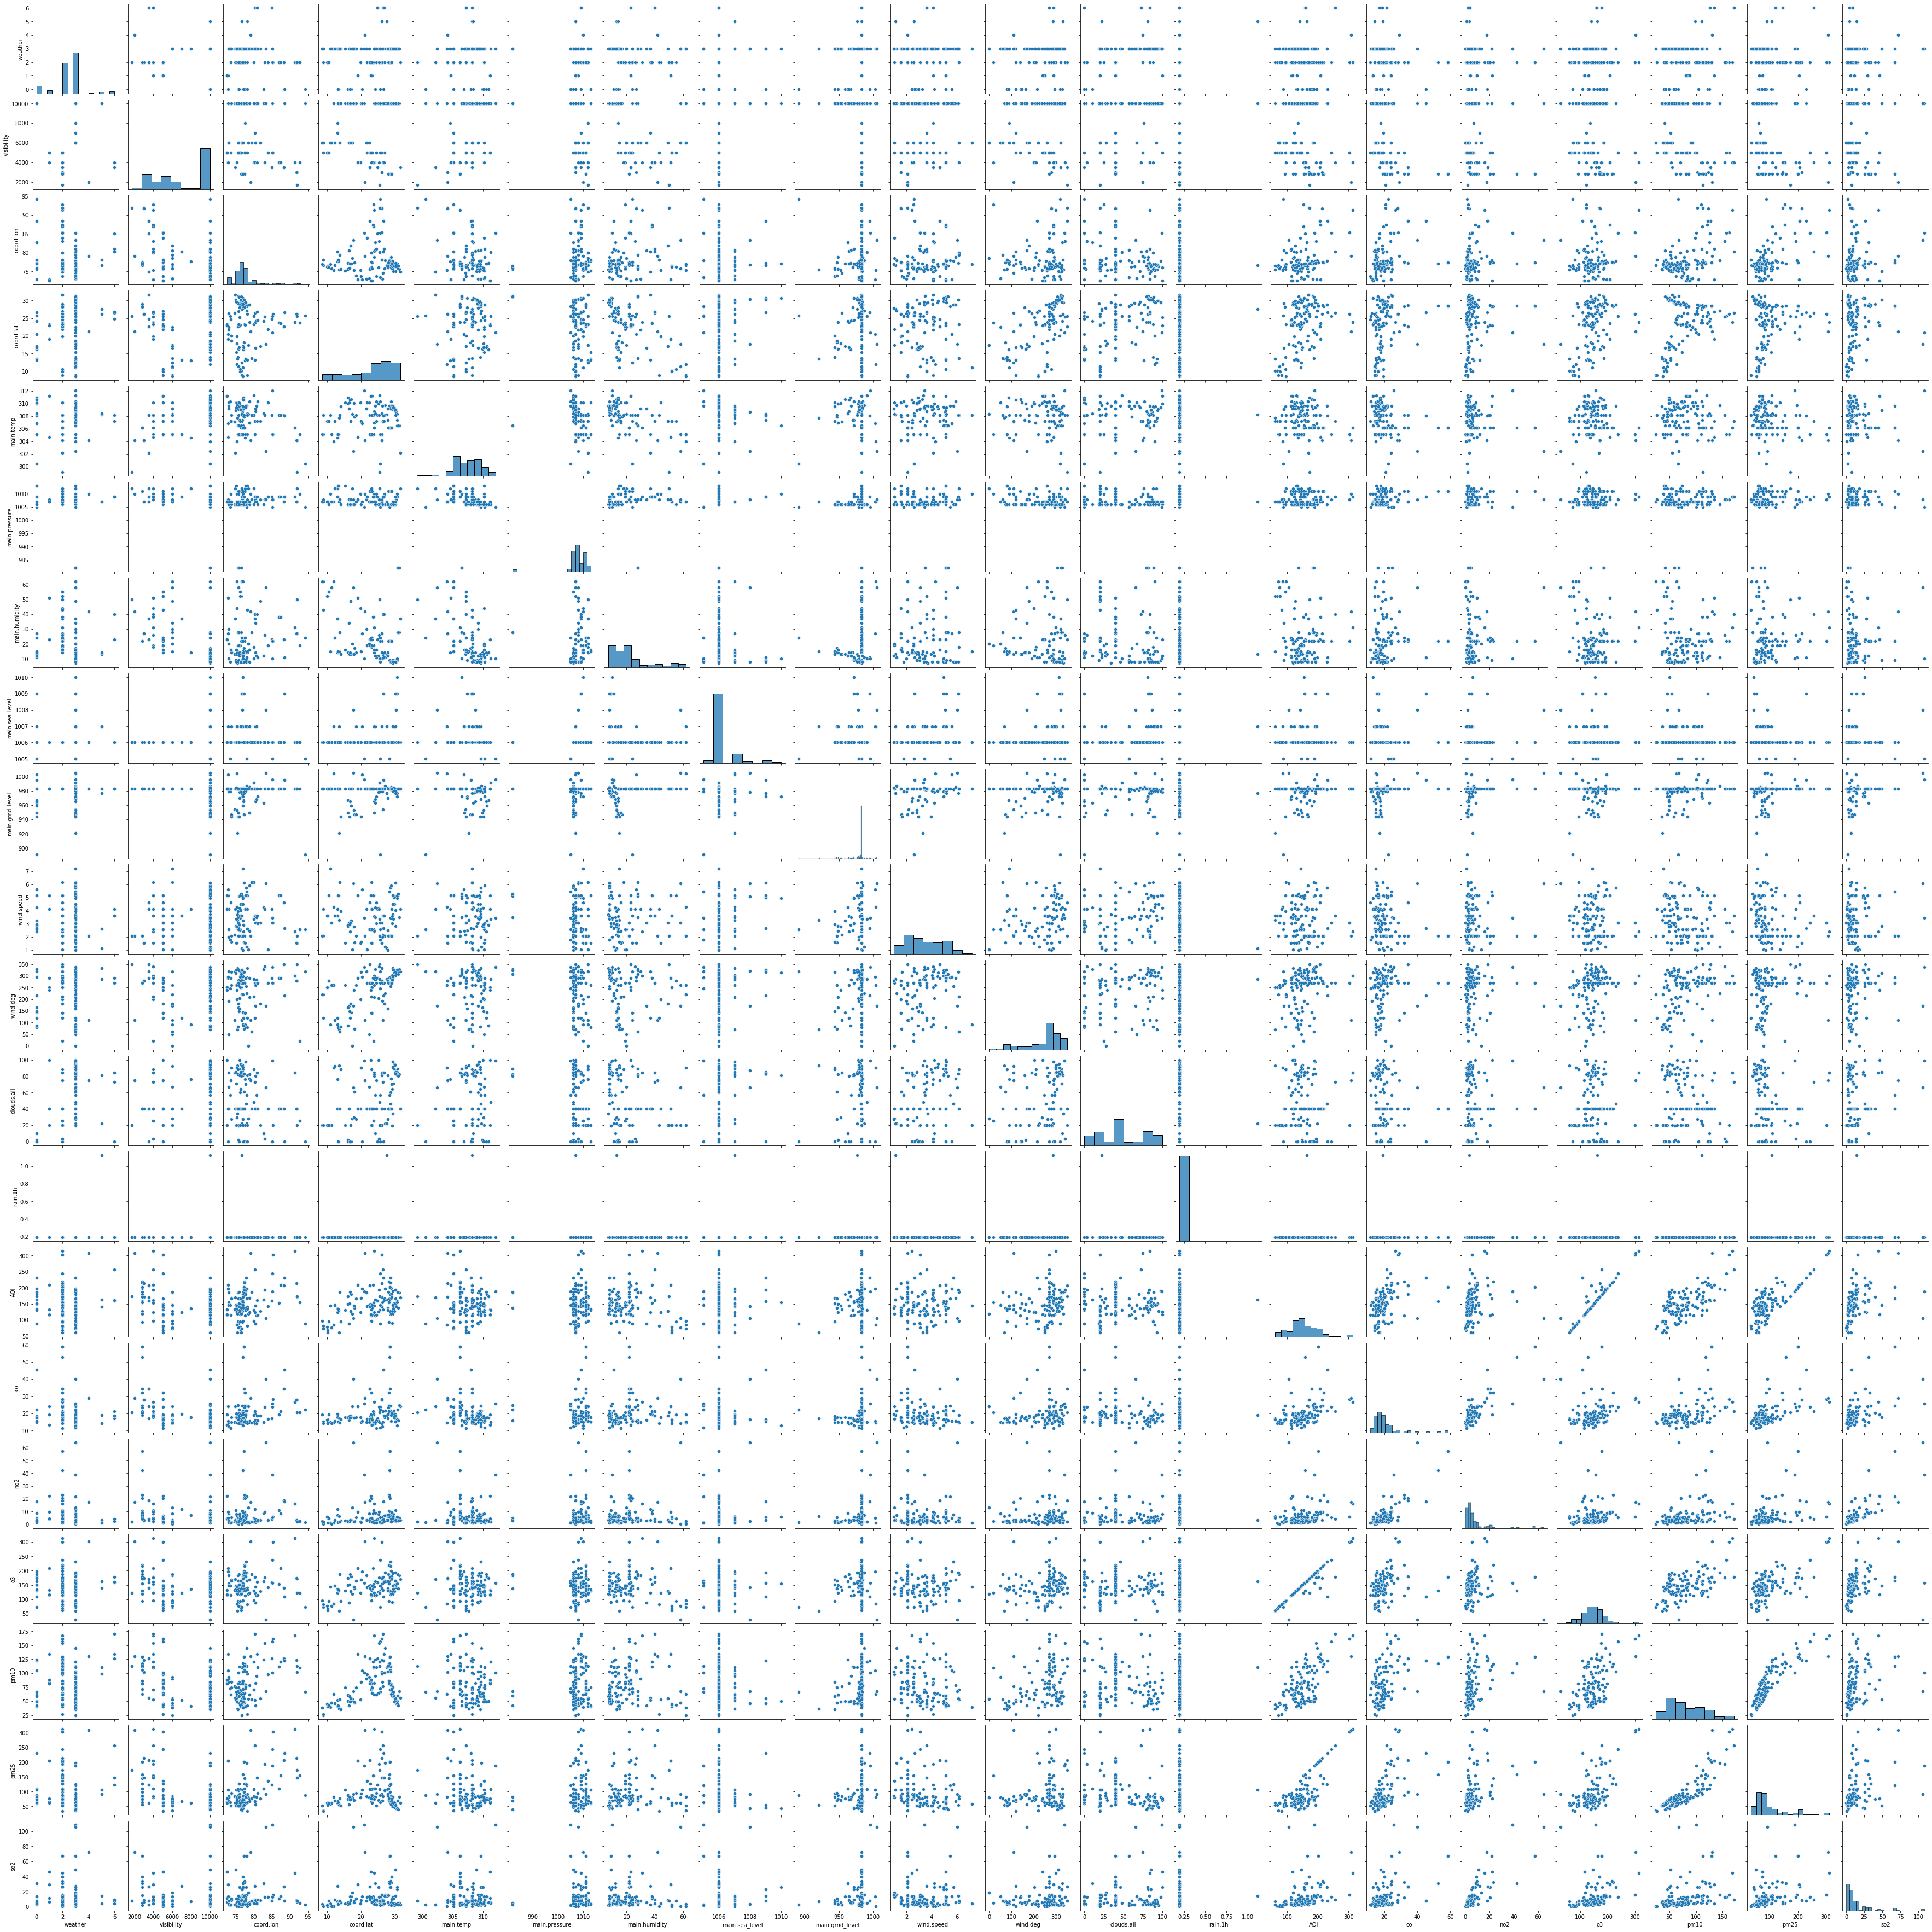

In [25]:
sns.pairplot(final_data)

In [26]:
def elbow_kmeans_city(final_data, maxRange = 10):
    try:
        X_w = final_data.drop('City',1)
        X_w = MinMaxScaler().fit_transform(X_w)
    except:
        X_w = MinMaxScaler().fit_transform(final_data)


    Error =[]
    for i in range(1, maxRange+1):
        kmeans = KMeans(n_clusters = i).fit(X_w)
        kmeans.fit(X_w)
        Error.append(kmeans.inertia_)

    plt.plot(range(1, maxRange+1), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()
    
    return(X_w)

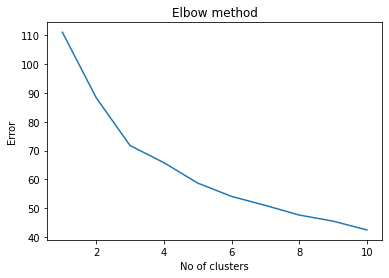

In [27]:
X_w = elbow_kmeans_city(final_data)

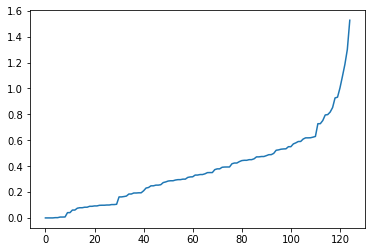

In [28]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_w)
distances, index = nbrs.kneighbors(X_w)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [29]:
address = 'India'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of India are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of India are 22.3511148, 78.6677428.


In [30]:
CLIENT_ID = 'V0DGIPOL3TARSV1GJA3IFZZMB4XK4BLS1WLMHEKVY0ZXOG5L' 
CLIENT_SECRET = 'OPHJQIJSA33Y3HU1TIM4LNMT5HJOAXAO2AU2VIITTPQGFU3S' # your Foursquare Secret
VERSION = '20200424' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V0DGIPOL3TARSV1GJA3IFZZMB4XK4BLS1WLMHEKVY0ZXOG5L
CLIENT_SECRET:OPHJQIJSA33Y3HU1TIM4LNMT5HJOAXAO2AU2VIITTPQGFU3S


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
LIMIT = 200
venues = getNearbyVenues(names=final_data['City'],
                         latitudes=final_data['coord.lat'],
                         longitudes=final_data['coord.lon']
                         )

Agartala
Belanganj
Ahmedabad
Aizawl
Ajmer
Alwar
Mangalagiri
Ambāla
Amritsar
Ankleshwar
Jaykaynagar
Aurangabad
Bagalkot
Bagpat
Bahadurgarh
Ballabgarh
Bathinda
Kanija Bhavan
Bhiwadi
Bhiwāni
Bhopal
Bhālki
Brajarajnagar
Bulandshahr
Chandigarh
Dispur
Park Town
Chik Ballāpur
Narasimharājapura
Coimbatore
Connaught Place
Dewas
Dhāruhera
Durgapur
Elūr
Perumpāvūr
Faridabad
Fatehābād
Gandhinagar
Gaya
Ghaziabad
Noida
Gurgaon
Guwahati
Gwalior
Babugarh
Hisar
Bara Bazar
Hubli
Hyderabad
Indore
Jabalpur
Jaipur
Jalandhar
Jīnd
Jodhpur
Kaithal
Wādi
Kannur
Kanpur
Karnāl
Murwāra
Maudaha
Kochi
Kohima
Kolār
Bara Bazar
Kollam
Keshorai Pātan
Kozhikode
Thānesar
Lucknow
Ludhiana
Maihar
Mohali
Mandideep
Fīrozpur Jhirka
Kāsan
Meerut
Morādābād
Konkan Division
Muzaffarnagar
Muzaffarpur
Mysore
Nagpur
Vadodara
Narnaul
Nashik
Konkan Division
Noida
Pāli
Palwal
Narāyangarh
Panipat
Patiāla
Patna
Pithampur
Pune
Mānvi
Rajahmundry
Rohtak
Nūrpur Kalān
Saugor
Madhogarh
Shillong
Shimoga
Siliguri
Singrauli
Sirsa
Pandharpur
Sonīpa

In [33]:
print(venues.shape)
venues.head()

(2091, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agartala,23.8312,91.2824,City Centre,23.829089,91.274870,Men's Store
1,Agartala,23.8312,91.2824,Phuchka corner,23.833919,91.280882,Salad Place
2,Agartala,23.8312,91.2824,United Colors of Benetton,23.828515,91.278856,Clothing Store
3,Agartala,23.8312,91.2824,Bahari Panch Foron,23.838950,91.285072,Indian Restaurant
4,Agartala,23.8312,91.2824,HDFC Bank ATM,23.829779,91.269509,ATM


In [34]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 204 uniques categories.


In [35]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Campground,Cave,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Organic Grocery,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,River,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track Stadium,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agartala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agartala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agartala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [36]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped.head()

,Neighborhood,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Campground,Cave,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,New American Restaurant,Nightclub,Optical Shop,Organic Grocery,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,River,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track Stadium,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,Agartala,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ahmedabad,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,7,0,0,1,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Aizawl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [37]:
venues_grouped= venues_grouped.rename(columns={"Neighborhood": "City"})

In [38]:
venues_grouped.head()

,City,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Campground,Cave,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,New American Restaurant,Nightclub,Optical Shop,Organic Grocery,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,River,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track Stadium,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,Agartala,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ahmedabad,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,7,0,0,1,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Aizawl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [39]:
final_df = final_data.join(venues_grouped.set_index('City'), on='City')
final_df.head()

,weather,visibility,City,coord.lon,coord.lat,main.temp,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,clouds.all,rain.1h,AQI,co,no2,o3,pm10,pm25,so2,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Campground,Cave,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,New American Restaurant,Nightclub,Optical Shop,Organic Grocery,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,River,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track Stadium,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,2,4000,Agartala,91.2824,23.8312,306.15,1009,31,1006,983,2.42,299,84,0.1954,313.93,26.70,16.06,313.93,167.88,311.42,44.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,10000,Belanganj,78.0098,27.1753,309.69,1006,11,1006,987,1.22

In [40]:
final_df = final_df.fillna(0)

In [41]:
from sklearn.linear_model import Ridge, LinearRegression

In [42]:
target = final_df[['AQI']]
target = MinMaxScaler().fit_transform(target)

predictors = final_df.drop(['City', 'weather','AQI','coord.lat','coord.lon'], axis=1)
X = MinMaxScaler().fit_transform(predictors)

In [43]:
reg = Ridge().fit(X, target)
reg.score(X, target)

0.9191459939433207

In [44]:
xxx = [i for i in reg.coef_]
xxx[0][1] = xxx[0][1]/5

In [45]:
coefficients = xxx
X = X * coefficients

In [46]:
norm_df = pd.DataFrame(X)
colNames = list(predictors.columns)

names_norm = {}

for i in range(0,len(colNames)):
    names_norm[i]=colNames[i]
    
norm_df = norm_df.rename(columns=names_norm)
norm_df.insert(0, 'City', final_df.City)
norm_df.drop_duplicates('City', inplace=True)

print(norm_df.shape)

norm_df.head()

(121, 219)


,City,visibility,main.temp,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,clouds.all,rain.1h,co,no2,o3,pm10,pm25,so2,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Campground,Cave,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,New American Restaurant,Nightclub,Optical Shop,Organic Grocery,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,River,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track Stadium,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,Agartala,-0.004575,-0.003600,-0.055725,-0.037125,0.018228,0.035524,0.010250,-0.007064,-0.008963,-0.0,0.024081,-0.015835,0.537895,0.092677,0.269251,0.028774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Belanganj,-0.016508,-0.005420,-0.049533,-0.006188,0.018228,

In [47]:
norm_df= norm_df.rename(columns={"name": "City"})

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [49]:
def from_city_cosSim(data, name):

    try:
        Xs = data[data.City == name].drop('City',1)
        Col_A = data[data.City != name].City
        Ys = data[data.City != name].drop('City',1)

        cosSim = cosine_similarity(X=Xs,Y=Ys)
        sim = list(cosSim[0])
        cty = list(Col_A)
        comb = {"City":cty,"Similarity":sim}
        dfdf = pd.DataFrame(comb).reset_index()

        # Adding a row with the Y City
        currCity = {"City":name,"Similarity":1}
        curr = pd.DataFrame(currCity, index=[0])

        # Concatenate to finalize DF
        dfdf = pd.concat([dfdf,curr], sort=False).reset_index(drop=True).drop('index',1)
        return(dfdf)
    except:
        print("Wrong input: this entry will be ignored")

In [50]:
def input_cities(numShow=10):
    # create class that defines cities
    class rated_city:
        def __init__(self, city):
            self.city = city
    
    #Loop to input cities based on the user
    add_city = True
    userInput = []
    w = 0
    while add_city == True:
        city_name = input("City (Include state - Ex. Agartala): ")
        userInput.append(city_name)
        simSim = from_city_cosSim(data=norm_df, name=city_name)
        try:
            cosSim = cosSim.merge(simSim, how='inner', on='City')
        except:
            cosSim = simSim
        
        city = rated_city(city_name)
        cont = input("Do you want to include another city?")
        add_city = cont.lower() in ['yes','true','of course','y','si','1']
        w+=1
    
    simCols = cosSim.drop("City",1)
    cits = cosSim.City
        
    for i, row in simCols.iterrows():
        simCols.at[i,'SumVal'] = row.sum()/w
    simi = simCols.SumVal
    
    out = {"City":cits,"Score":simi}
    out = pd.DataFrame(out).set_index("City").drop(userInput)
    out = out.sort_values('Score', ascending=False)
    
    return out.head(numShow)

In [51]:
input_cities()

City (Include state - Ex. Agartala): Gurgaon
Do you want to include another city?n


,Score
City,
Noida,0.992334
Faridabad,0.992334
Bara Bazar,0.977292
Aizawl,0.966435
Varanasi,0.962803
Guwahati,0.962434
Mandideep,0.962378
Tālcher,0.958134
Brajarajnagar,0.953016
